In [45]:
%matplotlib inline

from sklearn.datasets import fetch_mldata
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.ndimage.interpolation import shift

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

Write a function that can shift an MNIST image in any direction (left, right, up, or
down) by one pixel.5 Then, for each image in the training set, create four shifted
copies (one per direction) and add them to the training set. Finally, train your best
model on this expanded training set and measure its accuracy on the test set

In [46]:
mnist = fetch_mldata('MNIST original')

X, y = mnist['data'], mnist['target']

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [48]:
def shift_image(onedarray):
    shifted = list()
    img = onedarray.reshape(28, 28)
    shifts = ((1, 0), (-1, 0), (0, 1), (0, -1))
    for sh in shifts:
        shifted.append(shift(img, sh).flatten())
        
    return np.array(shifted)

def show_images(fig, onedarrays):
    width = len(onedarrays)
    for i in range(width):
        ax = fig.add_subplot(1, width, i+1)
        ax.imshow(onedarrays[i].reshape(28, 28), cmap=matplotlib.cm.binary, interpolation='nearest')

In [52]:
X_shifted = np.empty((0, 784))
y_shifted = np.empty((0))

for X_, y_ in zip(X_train, y_train):
    onedarrays = shift_image(X_)
    X_shifted = np.vstack((X_shifted, X_, onedarrays))
    y_shifted = np.concatenate((y_shifted, 5*[y_]))
    
    if len(y_shifted)>2000:
        break

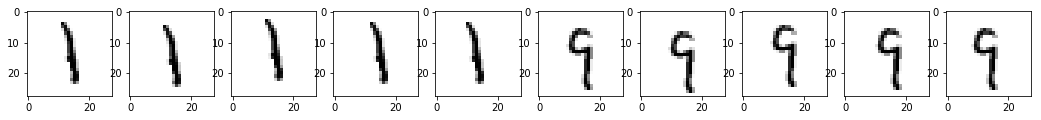

In [53]:
fig = plt.figure(figsize=(18, 3))
show_images(fig, X_shifted[:10])
plt.show()

In [55]:
clf = KNeighborsClassifier()
# knn_clf.fit(X_train, y_train_5)
cross_val_score(clf, X_shifted, y_shifted, cv=3, scoring='accuracy')

array([0.76865672, 0.74251497, 0.83958021])